In [99]:
def analisa_externo(G):
    
    """
    Para usar essa função, digite uma lista no formato G = ['A','A','B','B',...,'A','A'], com qualquer combinação desejada
    dos materiais A e B. Caso queria algo mais "longo" e e específico, tente fazer coisas como:
    
    G = 30*['A']
    G.append('B') # para inserir no final
    G.insert(0,'B') #para inserir no inicio
    
    Para criar 31 camadas (30A + 1B ou 1B + 30A).
    """
    
    import sympy as sp
    import numpy as np
    import matplotlib.pyplot as plt
    
    
    D = 120e-3
    e = 10e-3
    n = len(G)
    
    T_inf = 25 + 273.15
    T0 = 300 + 273.15
    
    ### CALCULO DO RAYLEIGH ##
    
    g = 9.81
    beta = 0.0034
    rho = 1.13331
    cp = 1007
    ts = 303.15
    k_ar = 0.0261
    alpha = 0.0000185
    
    ref = sp.Symbol('ref')
    
    Rad = (g*beta*(rho**2)*cp*(ts - T_inf)*ref**3)/(k_ar*alpha)
    
    ###-----------------------

    
    T = [T0]
    
    for i in range(1,n+3):
        T.append(sp.Symbol('T{}'.format(i)))
        
    sigma = 5.670e-8
        
    L = 1
    
    h0 = 50
    k0 = 1.2 
    k_A = 0.08
    k_B = 2.6
    
    e_A = 0.90
    e_B = 0.95
    
    
    r = [D/2, D/2 + e]
    
    for i in range(0,n):
        r.append(r[-1] + 2e-3)
        
    A = []
    
    for i in range(0,n+2):
        A.append(2*np.pi*r[i]*L)
        
    Req = []    
        
    R1 = 1/(h0*A[0]) #convecção interna
    
    R2 = np.log(r[1]/r[0])/(2*np.pi*L*k0) #condução do próprio tubo
    
    
    Req.append(R1)
    Req.append(R2)
    
    for i in range(0,n): #resistências de condução das camadas adicionadas
        if G[i] == 'A':
            Req.append(np.log(r[i+2]/r[i+1])/(2*np.pi*L*k_A))
        else:
            Req.append(np.log(r[i+2]/r[i+1])/(2*np.pi*L*k_B))
            
            
    Tm = (T[-1] + T_inf)/2
    
    
    Rad = Rad.subs({ref:2*r[-1]})
    
    if Rad > 10e4 and Rad < 10e7:
        Cc = 0.480
        nn = 0.250
    else:
        Cc = 0.125
        nn = 0.333

    def h_conv(q):
        return ((Cc*Rad**nn)*k_ar)/(2*q)
    
    h_conve = h_conv(r[-1])
    
    if G[-1] == 'A':
        R_out = 1/(A[-1]*h_conve) #convecção da parede
        R_rad = 1 /(4*sigma*e_A*(Tm**3) * A[-1]) #radiação da parede
        
    else:
        R_out = 1/(A[-1]*h_conve) #convecção da parede
        R_rad = 1 /(4*sigma*e_B*Tm**3 * A[-1])
        
    
    Rep = (R_out*R_rad)/(R_out+R_rad)
    
    Req.append(Rep)
    
    Q_dot = (T0 - T_inf)/sum(Req)
    
    sistema = sp.zeros(n+2,1)
    
    for i in range(0,n+2):
        sistema[i] = (-Q_dot*Req[i] + T[i] - T[i+1])
        
    chute = np.linspace(T0, T_inf, n+2)
    
    variaveis = T[1:n+3]
    
    solucao = np.array(sp.nsolve(sistema,variaveis,chute)) - 273.15
    
        
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot()
        
    for i in range(0,n+1):
        x = np.linspace(r[i],r[i+1],1000)
        y = [(solucao[i]-solucao[i+1])/(np.log(r[i]/r[i+1])) * np.log(f/r[i+1]) + solucao[i+1] for f in x]
            
        ax.plot(x,y, color = 'blue', lw = 2)
            
    plt.grid()
    ax.set_xlabel("Raio [mm]", fontsize=12)
    ax.set_ylabel("Temperatura Superficial [ºC]",fontsize=12)
    ax.set_title('Perfil de temperatura para {} camadas'.format(n), fontsize=14)
                
    plt.show()
    
        
    
    return 'Temperatura na Superfície: {} ºC'.format(round(solucao[-1][0],3))

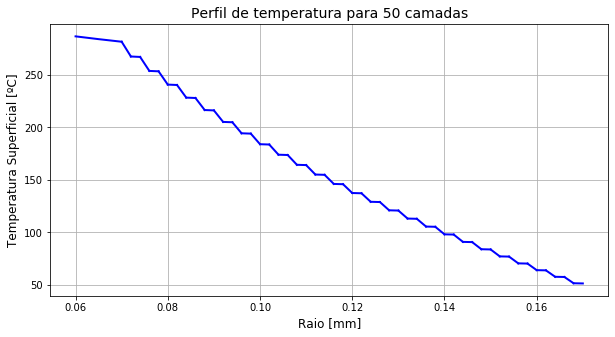

'Temperatura na Superfície: 51.411 ºC'

In [113]:
#EXEMPLO

P = []
for i in range(0,50):
    if i % 2 ==0:
        P.append('A')
    
    else:
        P.append('B')
        
analisa_externo(P)